<a href="https://colab.research.google.com/github/GaikwadSandesh/HotelBookingAnalysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the EDA
For any hotel it is important to know how much booking the hotel is going to get in particular months. Knowing it partially helps the hotel to maintain resources so that the best service can be provided with optimal use of resources.

It is also essential for the hotel to know what type of booking it gets and which type of booking it should look for so that it can make more profit. How much deposit should be taken so that the people will avoid cancelation or  canceled hotel booking makes some money.

This dataset will help look into the parameters which make customers cancel their bookings.


In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data 

In [180]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma_better/EDA _Project/Hotel _Bookings.csv')
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [181]:
dataframe.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Info of each column
*   holets :  data of two hotel city holet and resort hotel
*   is canceled : booking status
*   lead time : how many dayts before the arrival date booking was done
*   arrival_date_year , arrival_date_month, arrival_date_week_number arrival_date_day_of_month : selft explanatory
*   meal : which type of meal was ordered with room booking
 all other column are self expanatory by column name
*   all other column are self expanatory by column name

# Data cleaning and Null value handling

In [182]:
dataframe.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [183]:
print(round(100*(dataframe.isnull().sum()/len(dataframe.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


Handling Null vaules - 
* We can use most comman value for children and country.

* 94 percent data is missing for company value and 13.69 percent data is missing for agents

* We will drop the company and agent column straight away as it is missing most value , 

In [184]:
df = dataframe.drop(columns =['company' , 'agent'])

In [185]:
df.fillna(df.mode().iloc[0] , inplace = True)

In [186]:
# we will drop value with negative adr as we don't know what it means

df = df.drop(df[df.adr < 0].index)

### we will inspect each column now and keep only those columns which are related to cancellation of booking

# EDA

## Hotel Column

In [187]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [188]:
# lets get percentage of booking for each column
df['hotel'].value_counts(normalize = True).to_frame() 

,hotel
City Hotel,0.664467
Resort Hotel,0.335533


In [189]:
df.groupby(['hotel'])['is_canceled'].value_counts(normalize = True).to_frame().unstack()

is_canceled         
is_canceled            0        1
hotel                            
City Hotel       0.58273  0.41727
Resort Hotel     0.72236  0.27764

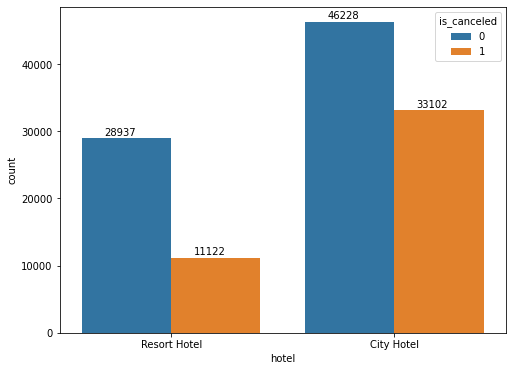

In [190]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'hotel' , data=df , hue='is_canceled')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

* Out of all bookings 66.4 % booking are for city hotel and 33.6  % bookings are for resort hotel
* City hoetl also has highest cancelation compared to resort hotel city hotel has cancelation of 41 % on the other hand resort hotel has less cancelation 

## Modify date 


we will convert arrivel date month ,  date and year as one date column to make data redable . and drop the old columns

In [191]:
df['arrival_date'] = df['arrival_date_day_of_month'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' +df['arrival_date_year'].astype(str)
df['arrival_date']= pd.to_datetime(df['arrival_date'])

In [192]:
df['arrival_day'] = df['arrival_date'].dt.day_name()

In [193]:
#df.drop(columns=['arrival_date_day_of_month' , 'arrival_date_month' ,'arrival_date_year' , 'arrival_date_week_number' , 'reservation_status_date' ], inplace = True)

##Meal column

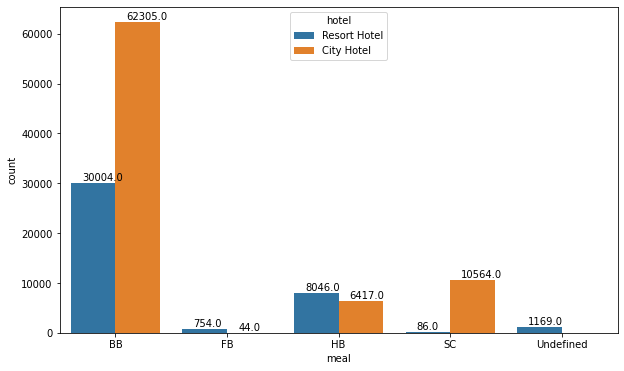

In [194]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'meal' , data=df, hue='hotel')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500) , fontsize = 10)

Meal can only mesure quality of service both hotels offers all standered meals packages and this parameter will be applicable for repeat custmores only . This parametere will be taen into account with cancelaltion of repeat custmores so we can eliminitate this column for time being . we can check cancellation for each meal time and rate of cancellation for for repeat cusmoers but that will be too naive to assume only meal parameter is of concern for cancellation of repeat custmoer

##Columns related to number of peoples

In [195]:
children_df = df.groupby([ 'children'])['is_canceled'].value_counts(normalize=True).to_frame().unstack().fillna(0)
children_df

is_canceled          
is_canceled           0         1
children                         
0.0            0.629076  0.370924
1.0            0.677638  0.322362
2.0            0.578039  0.421961
3.0            0.776316  0.223684
10.0           0.000000  1.000000

In [196]:
baibies_df = df.groupby([ 'babies'])['is_canceled'].value_counts(normalize=True).to_frame().unstack().fillna(0)
baibies_df

is_canceled          
is_canceled           0         1
babies                           
0              0.628123  0.371877
1              0.816667  0.183333
2              0.866667  0.133333
9              1.000000  0.000000
10             1.000000  0.000000

In [197]:
df['people'] = df['adults'] + df['children'] +df['babies']

In [198]:
#df.drop(columns = ['children' , 'babies' , 'adults'], inplace= True)`a

* Number of children , babies, adults has nothig to do with cancellation rate there is more cancellation for higher adults but its already captured in market segment category we can drop these coulums 

* one thing is noticable that cancellation for couples with babies is lower than the cancellation for people without babies this is maybe because people with babies plan their trip only if they are sure or the trip is essential which can not be avoided . It is just guess .

## Weekday-Weekend stay

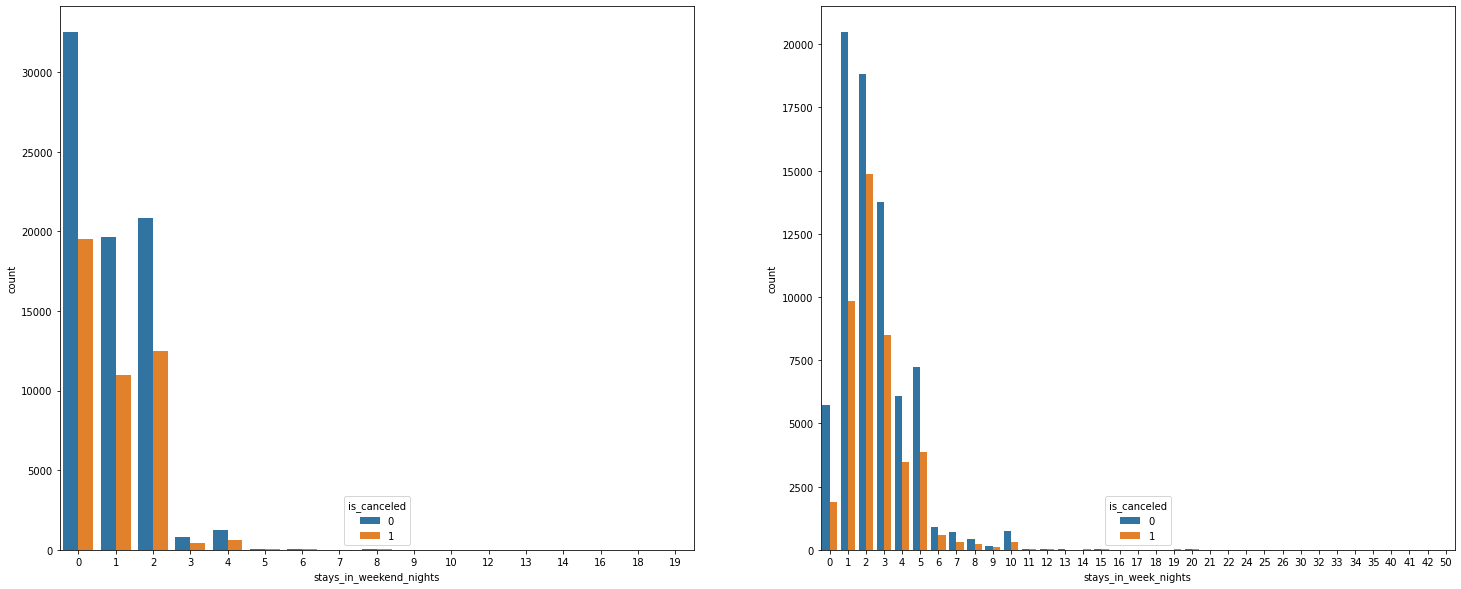

In [199]:
fig , axis =plt.subplots(1, 2, figsize=(25,10))
sns.countplot(x = 'stays_in_weekend_nights', data=df, hue='is_canceled' , ax=axis[0] )
sns.countplot(x = 'stays_in_week_nights'   , data=df, hue='is_canceled' , ax =axis[1])

avg cancelation for weekday and weekend booking is almost same so there is no point in further analaysis of this data . we can drop this two columns

In [200]:
# df.drop(columns = ['stays_in_weekend_nights' , 'stays_in_week_nights'], inplace= True)

## Lead time

Text(0.5, 1.0, 'Booking Data for 2017')

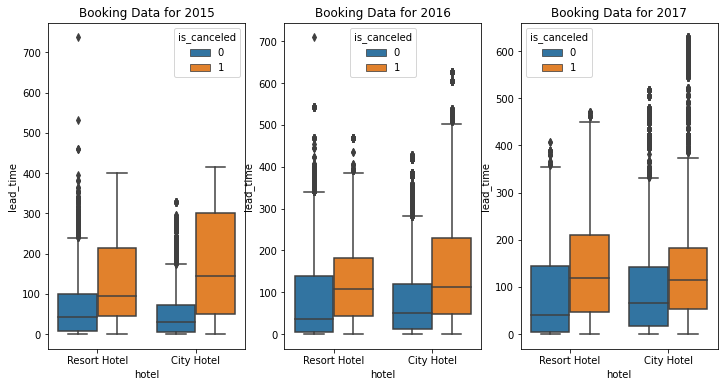

In [201]:
fig , axis = plt.subplots(1,3 ,figsize=(12,6))
ax15 = sns.boxplot(y = 'lead_time', x= 'hotel',data=df.loc[df['arrival_date_year'] == 2015] , hue='is_canceled' , ax= axis[0])
ax16 =sns.boxplot(y = 'lead_time', x= 'hotel',data=df.loc[df['arrival_date_year'] == 2016] , hue='is_canceled' , ax= axis[1])
ax17 =sns.boxplot(y = 'lead_time', x= 'hotel',data=df.loc[df['arrival_date_year'] == 2017] , hue='is_canceled' , ax= axis[2])
ax15.set_title('Booking Data for 2015')
ax16.set_title('Booking Data for 2016')
ax17.set_title('Booking Data for 2017')

* We can observe that people with higher lead times have a higher cancellation rate . 
* To avoid losses either the Hotel can ask to reconfirm the booking a few days prior to the booking date or charge a refundable booking deposit as the hotel will get free cash for a long duration
* 125 days seems like a Good threshold to apply above changes 

##Repeated guset type

In [202]:
df.groupby(['hotel'])['is_repeated_guest'].value_counts(normalize = True).to_frame().unstack()

is_repeated_guest          
is_repeated_guest                 0         1
hotel                                        
City Hotel                 0.974385  0.025615
Resort Hotel               0.955640  0.044360

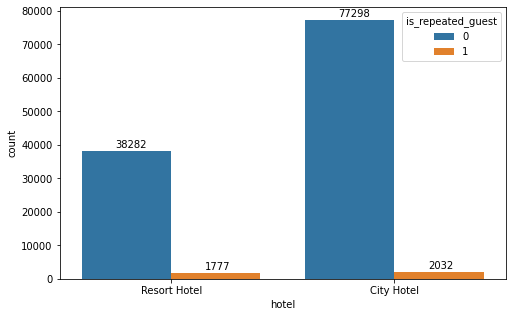

In [203]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'hotel' , data=df , hue='is_repeated_guest')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.15, p.get_height()+1000))

Repeated guest are very few in numbers

In [204]:
# insted of doing group by every time we create a data frames for each hotel
Resort_df = df.loc[df['hotel'] == 'Resort Hotel']
City_df = df.loc[df['hotel'] == 'City Hotel']

In [205]:
resort_repeated =  Resort_df.loc[Resort_df['is_repeated_guest'] == 1]['is_canceled'].value_counts() 
resort_new      =  Resort_df.loc[Resort_df['is_repeated_guest'] == 0]['is_canceled'].value_counts()
city_repeated   =  City_df.loc[City_df['is_repeated_guest'] == 0]['is_canceled'].value_counts()
city_new        =  City_df.loc[City_df['is_repeated_guest'] == 1]['is_canceled'].value_counts()

In [206]:
city_new

0    1591
1     441
Name: is_canceled, dtype: int64

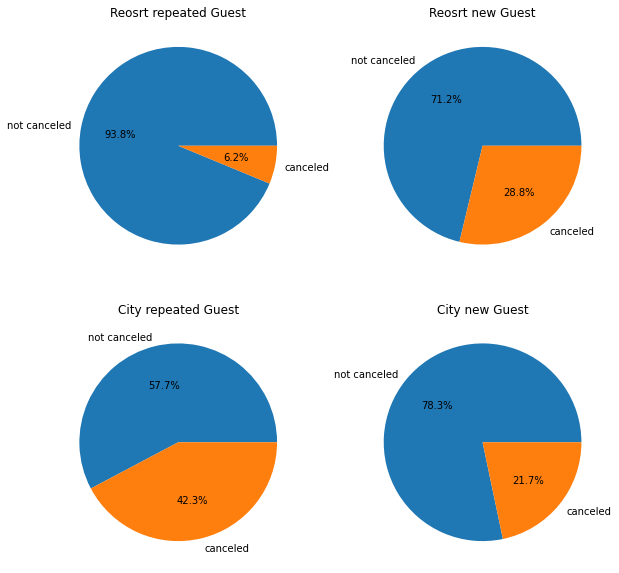

In [207]:
label = ('not canceled' , 'canceled' )
fig , axis = plt.subplots(2,2 ,figsize=(10,10))

axis[0,0].pie(resort_repeated , labels=label, autopct='%1.1f%%')
axis[0,1].pie(resort_new ,      labels=label, autopct='%1.1f%%')
axis[1,0].pie(city_repeated ,   labels=label, autopct='%1.1f%%')
axis[1,1].pie(city_new ,        labels=label, autopct='%1.1f%%')

axis[0,0].set_title('Reosrt repeated Guest')
axis[0,1].set_title('Reosrt new Guest')
axis[1,0].set_title('City repeated Guest')
axis[1,1].set_title('City new Guest' )

plt.show()

* overall repeated guests are very few compareed to new guest Resort Hotel has 4.5 percentage reaped guest while city has only 2.7 percentage repeated guet
* Resort also has significantly lower cancelation compared to city
* cancellation for new custmores is almost same for both Resort and City hotel

we can see car paking is not an issue and can be dropped as all the cancellation are from those who don't need car parking

## Special Request

In [208]:
special_request_df = df.groupby(['hotel' , 'is_canceled'])['total_of_special_requests'].value_counts(normalize = True).to_frame().unstack(level = 1)
special_request_df

total_of_special_requests          
is_canceled                                                    0         1
hotel        total_of_special_requests                                    
City Hotel   0                                          0.467617  0.795722
             1                                          0.361231  0.142620
             2                                          0.138509  0.052535
             3                                          0.028273  0.008459
             4                                          0.003829  0.000634
             5                                          0.000541  0.000030
Resort Hotel 0                                          0.523344  0.648804
             1                                          0.318243  0.233501
             2                                          0.127864  0.101331
             3                                          0.025711  0.014925
             4                                          0.004389  0.001349
             5                                          0.000449  0.000090

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


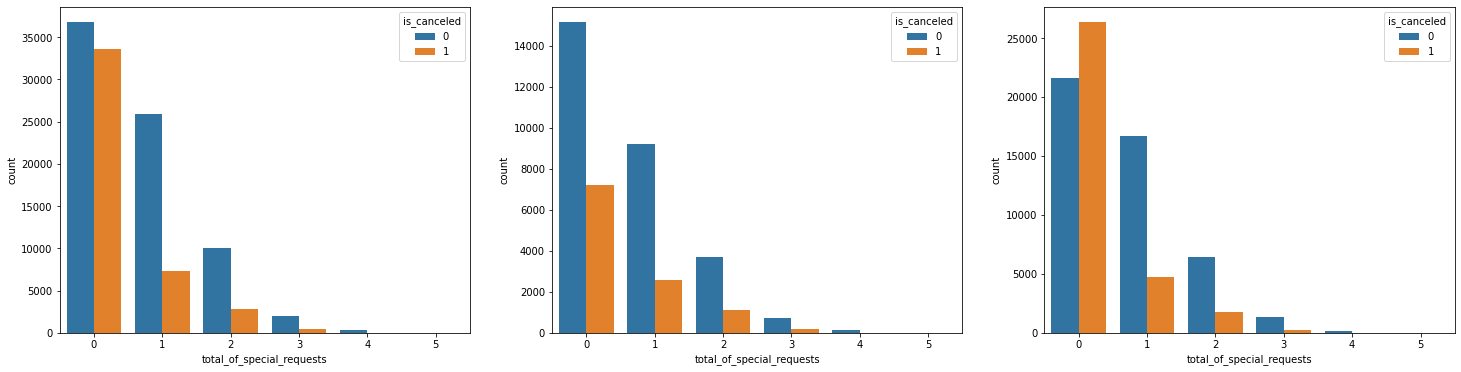

In [209]:

fig , axis = plt.subplots(1,3 ,figsize=(25,6))

ax0 =sns.countplot('total_of_special_requests' , data = df , hue='is_canceled' , ax = axis[0])
ax1 =sns.countplot('total_of_special_requests' , data = Resort_df , hue='is_canceled' , ax = axis[1])
ax2 =sns.countplot('total_of_special_requests' , data = City_df , hue='is_canceled' , ax = axis[2])

we can see the cancellation is not increseing as the special request increse so for now we can drop the column

## Deposit

In [210]:
df['deposit_type'].value_counts()

No Deposit    104640
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [211]:
deposittype_df = df.groupby(['deposit_type'])['is_canceled'].value_counts().to_frame().unstack()
deposittype_df_N = df.groupby(['deposit_type'])['is_canceled'].value_counts(normalize= True).to_frame().unstack()
deposittype_df

is_canceled       
is_canceled            0      1
deposit_type                   
No Deposit         74946  29694
Non Refund            93  14494
Refundable           126     36

In [212]:
deposittype_df_N

is_canceled          
is_canceled            0         1
deposit_type                      
No Deposit      0.716227  0.283773
Non Refund      0.006376  0.993624
Refundable      0.777778  0.222222

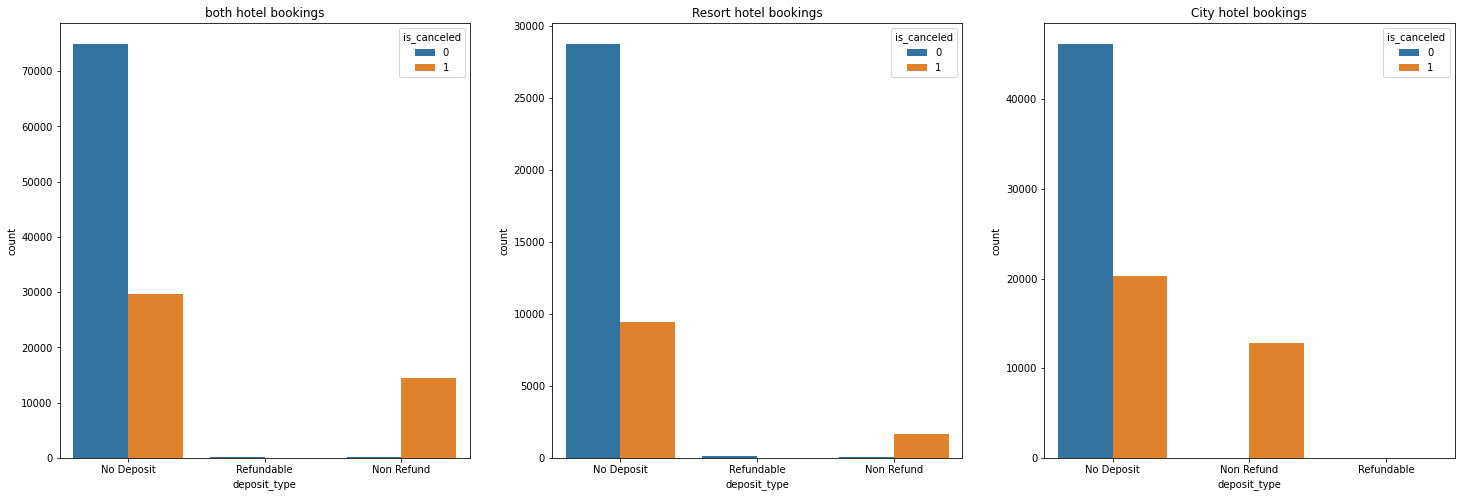

In [213]:
fig , axis =plt.subplots(1, 3, figsize=(25,8))
ax_all =sns.countplot(x = 'deposit_type', data=df, hue='is_canceled' , ax=axis[0] )
ax_resort =sns.countplot(x = 'deposit_type', data=Resort_df, hue='is_canceled' , ax=axis[1] )
ax_city =sns.countplot(x = 'deposit_type', data=City_df, hue='is_canceled' , ax=axis[2] )
ax_all.set_title('both hotel bookings')
ax_resort.set_title('Resort hotel bookings')
ax_city.set_title('City hotel bookings')
plt.show()

* we can see the most of the bookings  are for No deposite categorie
* the cancellation is significantly higher for non refundable category
* refundable has very few bookings so it won't be fair to compare

It is very contrary to what should ideally happen but the good thing is the hotel is making a few bucks from these bookings. Probably hotel has its own system which checks the probability of cancellation and asks for deposit

## Market segment

In [214]:
df.groupby(['market_segment'])['is_canceled'].value_counts(normalize = True).to_frame().unstack()

is_canceled          
is_canceled              0         1
market_segment                      
Aviation          0.780591  0.219409
Complementary     0.869448  0.130552
Corporate         0.812653  0.187347
Direct            0.846581  0.153419
Groups            0.389349  0.610651
Offline TA/TO     0.656840  0.343160
Online TA         0.632789  0.367211
Undefined              NaN  1.000000

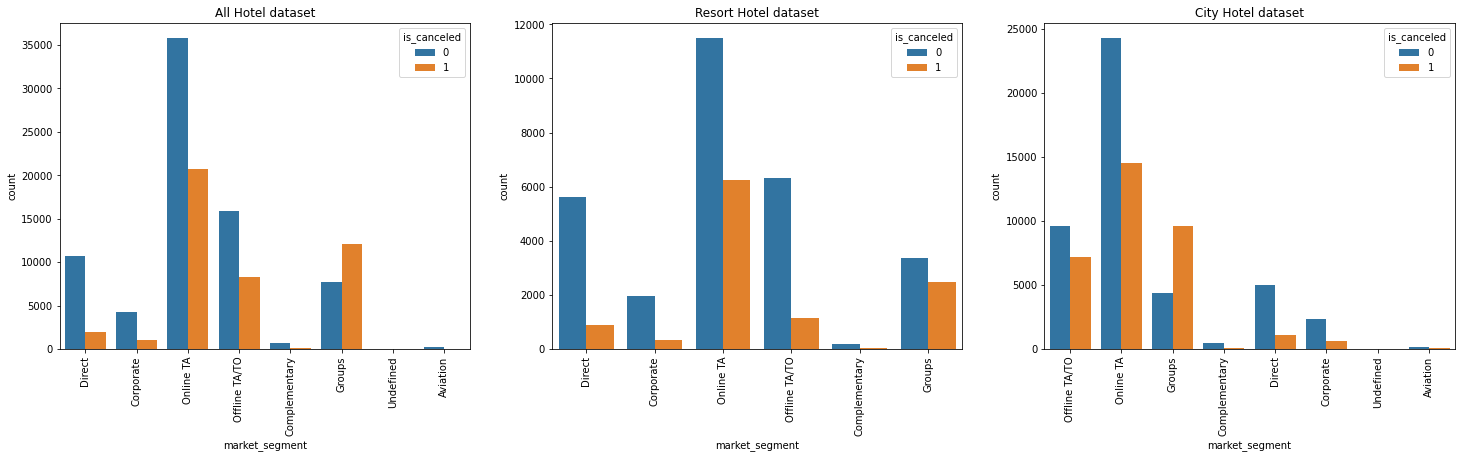

In [215]:
fig , axis =plt.subplots(1, 3, figsize=(25,6))
sns.countplot(x = 'market_segment', data=df, hue='is_canceled' , ax=axis[0] )
sns.countplot(x = 'market_segment', data=Resort_df, hue='is_canceled' , ax=axis[1] )
sns.countplot(x = 'market_segment', data=City_df, hue='is_canceled' , ax=axis[2] )
axis[0].set_xticklabels(axis[0].get_xticklabels() ,rotation=90)
axis[1].set_xticklabels(axis[1].get_xticklabels() ,rotation=90)
axis[2].set_xticklabels(axis[2].get_xticklabels() ,rotation=90)
axis[0].set_title('All Hotel dataset')
axis[1].set_title('Resort Hotel dataset')
axis[2].set_title('City Hotel dataset')
plt.show()

* Canceleation pattern remains almost same for Resort Hotel and City hotel .
* Only groups category in Resort hotel has higher cancellation. while city hotel does really good job group custmoers, as it is the only segment where cancelation are almost half of no cancelation  

## Month wise analysis each hotel

In [216]:
cancelation_by_month = df.pivot_table(index='arrival_date_month' )['is_canceled'].to_frame()

Text(0.5, 1.0, 'booking trend')

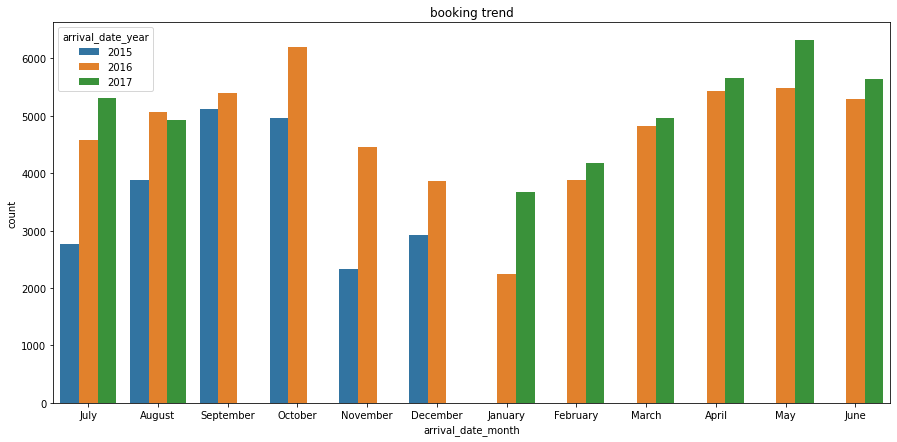

In [217]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x = 'arrival_date_month', data=df, hue='arrival_date_year' )
ax.set_title('booking trend')

* we can see the boking are increasing years on year h for all hotels

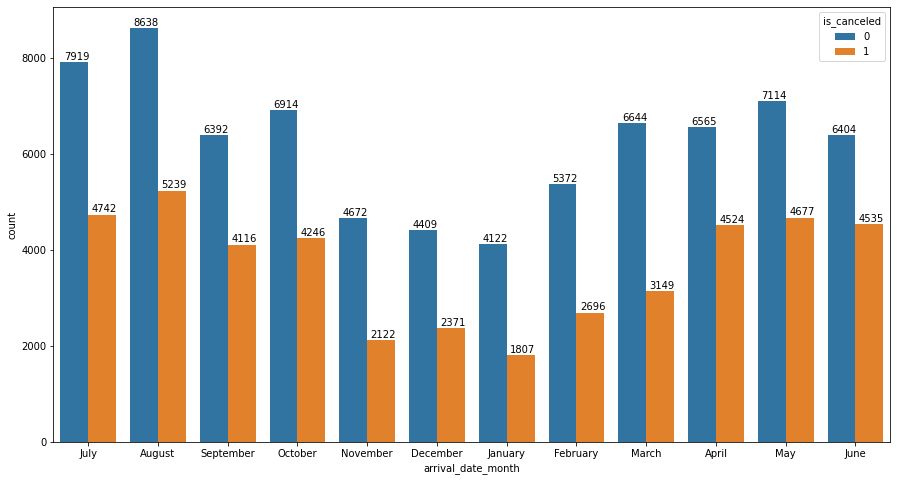

In [218]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'arrival_date_month', data=df, hue='is_canceled'  )
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.05, p.get_height()+50))

In [219]:
month_df = df.groupby(['arrival_date_month'])['is_canceled'].value_counts(normalize= True).to_frame().unstack(level = 0)
month_df

is_canceled                                         \
arrival_date_month       April    August  December February   January   
is_canceled                                                             
0                     0.592028  0.622469  0.650295  0.66584  0.695227   
1                     0.407972  0.377531  0.349705  0.33416  0.304773   

                                                                      \
arrival_date_month      July      June     March       May  November   
is_canceled                                                            
0                   0.625464  0.585428  0.678444  0.603342  0.687666   
1                   0.374536  0.414572  0.321556  0.396658  0.312334   

                                        
arrival_date_month   October September  
is_canceled                             
0                   0.619534  0.608298  
1                   0.380466  0.391702

 * Most moths have cancelleation around 62 +- 5 %
 * There is no significant pattern by month

## Distribution Channel 

In [220]:
df['distribution_channel'].value_counts(normalize=True).to_frame()

,distribution_channel
TA/TO,0.819757
Direct,0.122658
Corporate,0.055926
GDS,0.001617
Undefined,0.000042


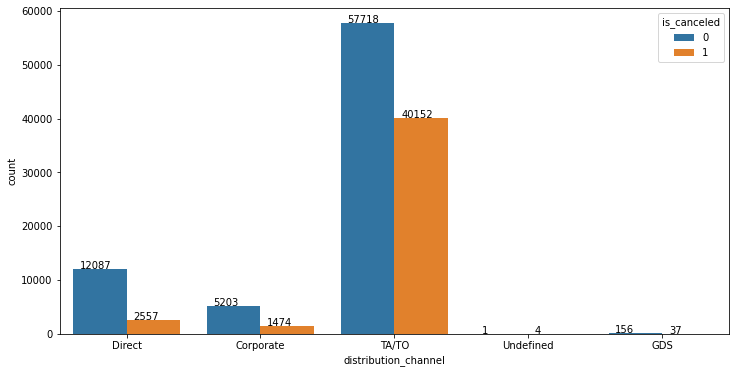

In [221]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'distribution_channel' , data=df, hue='is_canceled' )
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.05, p.get_height()+50))

* Travel agent are responsible for bringing most of the bookings, accounting 82.5 % of total booking
* Second highest booking comes from direct booking category- 12.2 % 
* Third highest are corporate bookings - 5.5%


## Previous Cancellation

In [222]:
df.loc[df['is_repeated_guest'] == 1]['previous_cancellations'].value_counts(normalize = True)

0     0.756629
1     0.181938
2     0.019953
3     0.013652
4     0.008139
11    0.007088
5     0.004988
6     0.004201
13    0.003150
21    0.000263
Name: previous_cancellations, dtype: float64

In [223]:
df.loc[df['is_repeated_guest'] == 1].groupby(['previous_cancellations'])['is_canceled'].value_counts(normalize = True).to_frame().unstack().fillna(0)

is_canceled          
is_canceled                      0         1
previous_cancellations                      
0                         0.968772  0.031228
1                         0.402597  0.597403
2                         0.789474  0.210526
3                         0.846154  0.153846
4                         0.774194  0.225806
5                         0.894737  0.105263
6                         0.937500  0.062500
11                        0.925926  0.074074
13                        0.083333  0.916667
21                        0.000000  1.000000

* Repeated custmore with no previous cancelation have very less percentage of booking cancelation 
* People who have canceled once have more cancelation
* The ones who have canceled twice have small cancelation but the numbers are small so it can't be trusted and seems counter intuative .
* Compared with one cancelation overall people with more cancelation have higher chance of cancelation it is hotel should charge some deposite from this cusmore to improve profit

## Avg daily check in by month 

<Figure size 432x432 with 0 Axes>

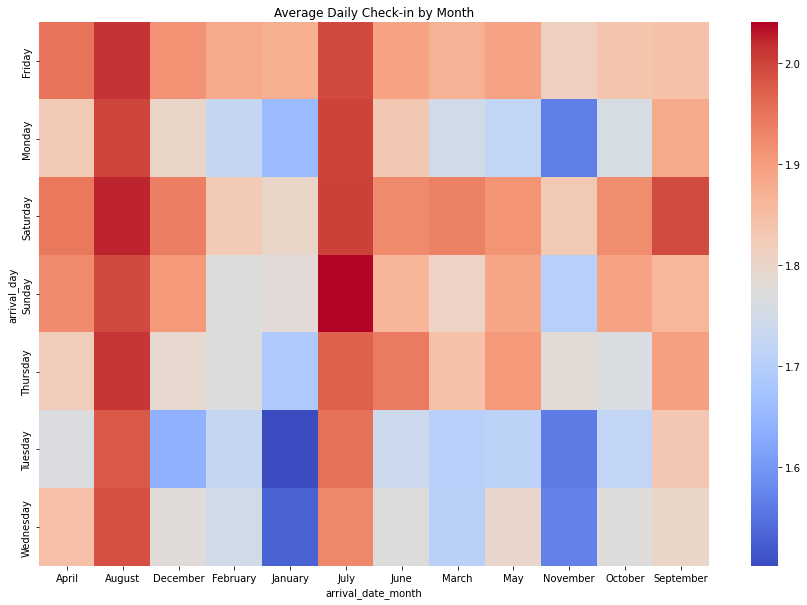

In [224]:
plt.figure(figsize=(6,6))
checkinday = df.groupby(['arrival_day', 'arrival_date_month']).mean()['adults'].unstack(level = -1)
plt.figure(figsize = (15,10))
sns.heatmap(checkinday, cmap = 'coolwarm')
plt.title("Average Daily Check-in by Month")
plt.show()

* Most of check in are on weekend Friday and saturday counts have the highest booking
* Monday,wednesday and tuesday have the lowest booking


## Expected Money Spend

In [225]:
df['money_spent'] = df['adr']* (df['stays_in_weekend_nights'] + df['stays_in_week_nights'] )

Text(0.5, 1.0, 'Money spent EDA')

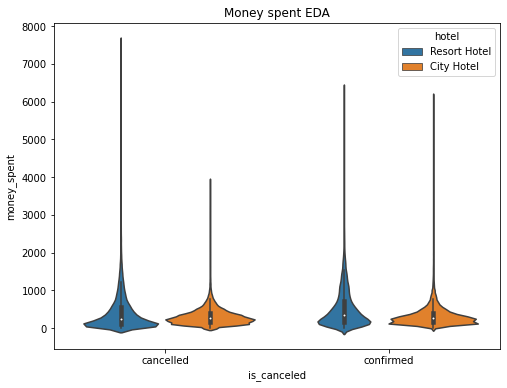

In [226]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(data = df , y = 'money_spent' , x = 'is_canceled' ,  hue='hotel'  )
ax.set(xticklabels = ['cancelled' , 'confirmed'])
ax.set_title('Money spent EDA')

* Resort Hotel is able to convert high value customer  turn in but fails to convert low value bookings to confirmed customers
* City hotel has more low value customers compared to resort hotel  and fails to convert high value bookings to confirmed customers


## Country

In [227]:
df['country'].value_counts(normalize = True).to_frame().head(10)

,country
PRT,0.411076
GBR,0.101584
FRA,0.087236
ESP,0.071765
DEU,0.061036
ITA,0.031544
IRL,0.028269
BEL,0.019617
BRA,0.018628
NLD,0.017623


In [228]:
df['country'].value_counts(normalize = True).to_frame().head(10).sum()

country    0.848378
dtype: float64

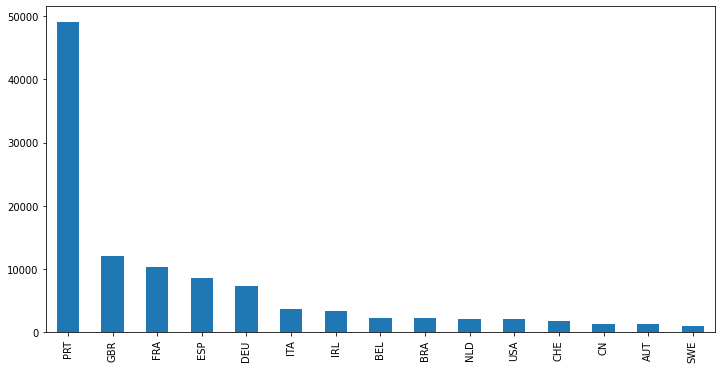

In [229]:
plt.figure(figsize=(12,6))
df['country'].value_counts().to_frame().head(15)['country'].plot(kind = 'bar')

* Portugal , United Kingdom , France , Spain , Germeny , Italy , Ireland , Belgium are top countries
* top 10 countries account for 84.8 % of bookings

## Reserved room type

In [230]:
room_type_number = df['reserved_room_type'].value_counts().to_frame()
room_type_percentage = df['reserved_room_type'].value_counts(normalize =True).to_frame()
adr_by_room_type = df.groupby(['reserved_room_type'])['adr'].mean().to_frame()

In [231]:
room_df  =pd.merge(pd.merge(room_type_number, room_type_percentage, left_index=True, right_index=True) ,adr_by_room_type ,left_index=True, right_index=True )
room_df.rename(columns = {'reserved_room_type_x':'number of booking', 'reserved_room_type_y':'percentage number bookings'}, inplace = True)
room_df

,number of booking,percentage number bookings,adr
A,85993,0.720276,90.797788
D,19201,0.160827,120.682882
E,6535,0.054737,124.540179
F,2897,0.024265,167.689651
G,2094,0.017539,175.996027
B,1118,0.009364,90.360447
C,932,0.007806,160.216792
H,601,0.005034,188.223111
P,12,0.000101,0.000000
L,6,0.000050,124.666667


* to get better understanding we will group by room types adr 
  * low_cost - A , B , P
  * Economic - D ,E , L
  * Premium - F , C
  * Luxury- G , H

In [232]:
low_cost_ = ['A' , 'B' , 'P' ]
economic_ = ['D' , 'E' ,'L']
premium_ = ['F' , 'C']
luxury_ = ['G' ,'H']

In [233]:
def room_value_updater(room):
  low_cost_ = ['A' , 'B' , 'P' ]
  economic_ = ['D' , 'E' ,'L']
  premium_ = ['F' , 'C']
  luxury_ = ['G' ,'H']
  room_type = 'low_cost'
  if room in low_cost_:
    room_type = 'low_cost'
  elif room in economic_:
    room_type = 'economic'
  elif room in premium_ :
    room_type = 'premium'
  else :
    room_type = 'luxury' 
  return room_type


In [234]:
df['room_value_cat'] = df['reserved_room_type'].apply(room_value_updater)
Resort_df['room_value_cat'] = Resort_df['reserved_room_type'].apply(room_value_updater)
City_df['room_value_cat'] = City_df['reserved_room_type'].apply(room_value_updater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [235]:
all_room_cat_df = df['room_value_cat'].value_counts().to_frame()
city_room_cat_df = City_df['room_value_cat'].value_counts().to_frame()
#room_df.rename(columns = {'reserved_room_type_x':'number of booking', 'reserved_room_type_y':'percentage number bookings'}, inplace = True)
rv_df = pd.merge(all_room_cat_df , city_room_cat_df ,left_index=True, right_index=True )
rv_df.rename(columns = {'room_value_cat_x' : 'All' , 'room_value_cat_y': 'City Hotel'} , inplace =True)

In [236]:
rv_df['Resort Hotel'] = rv_df['All'] - rv_df['City Hotel']
rv_df['city percent'] = rv_df['City Hotel'] /  rv_df['All'] * 100
rv_df['Resort percent'] = 100 - rv_df['city percent']

In [237]:
rv_df

,All,City Hotel,Resort Hotel,city percent,Resort percent
low_cost,87123,63720,23403,73.137977,26.862023
economic,25742,13321,12421,51.748116,48.251884
premium,3829,1805,2024,47.140245,52.859755
luxury,2695,484,2211,17.959184,82.040816


*  Most of the bookings are for low cost rooms , as price increases number the booking decrease which is pretty obvious
* Most high-value customers choose the resort hotel while low-value customers choose the city hotel

## Days in waiting list

In [238]:
df['waiting_group_Group'] = pd.cut(df['days_in_waiting_list'],[0, 1, 2, 3, 8, 25, 80, 1000])

In [239]:
df.groupby(['waiting_group_Group'])['is_canceled'].value_counts(normalize =True).to_frame().unstack().fillna(0)

is_canceled          
is_canceled                   0         1
waiting_group_Group                      
(0, 1]                 0.750000  0.250000
(1, 2]                 0.800000  0.200000
(2, 3]                 0.000000  1.000000
(3, 8]                 0.666667  0.333333
(8, 25]                0.181818  0.818182
(25, 80]               0.323738  0.676262
(80, 1000]             0.497661  0.502339

There is no cancellation pattern between waiting time and cancelletion rate

## Car parking

In [240]:
df.groupby(['required_car_parking_spaces'])['is_canceled'].value_counts(normalize =True).to_frame().unstack().fillna(0)

is_canceled          
is_canceled                           0         1
required_car_parking_spaces                      
0                              0.605048  0.394952
1                              1.000000  0.000000
2                              1.000000  0.000000
3                              1.000000  0.000000
8                              1.000000  0.000000

There is no cancelletion for booking with car parking requests so car parking is no issue 

## summery

* City Hotel gets higher booking than Resort hotel
* The resort hotel has a lower cancelation rate than the City hotel
* Resort hotel gets most high value customers
* Bookings with more than 150 days of lead time mostly get canceled
* Wekkend are more crowded than weekdays


#  Recommendations

* Hotels should charge some booking deposit for the following types of people 
  * People who have a lead time greater than 100 days
  * Customers with previous cancellations
  * Large group bookings
  * Crowded months (July, August) so that full utilization can happen
